# Day 2: Exploratory Data Analysis (EDA)
**Objective:** Understand data using statistics and visualizations
**Tools:** Pandas, Matplotlib, Seaborn, Plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("../data/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Generate summary statistics (mean, median, std, etc.).
print(df.info())
print(df.describe())
print(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

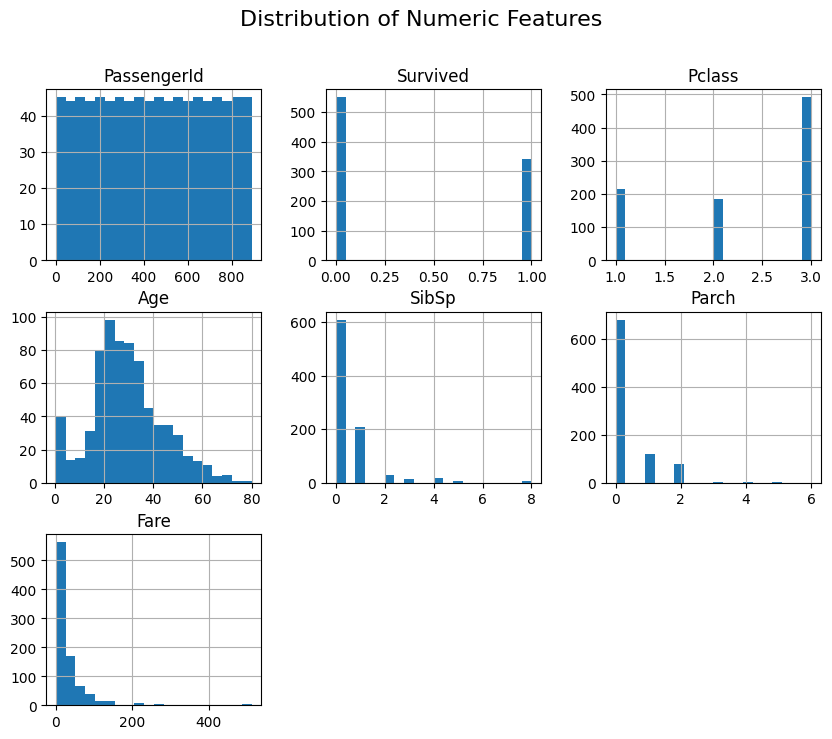

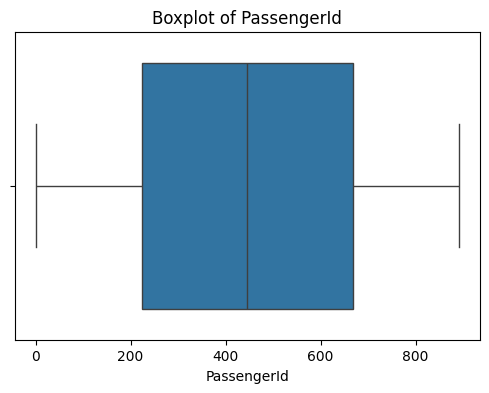

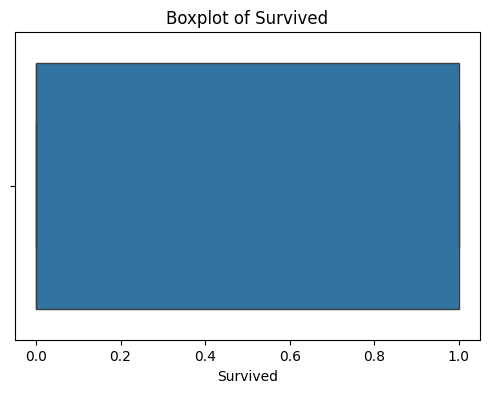

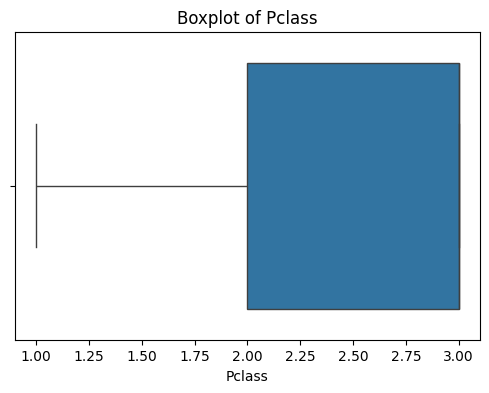

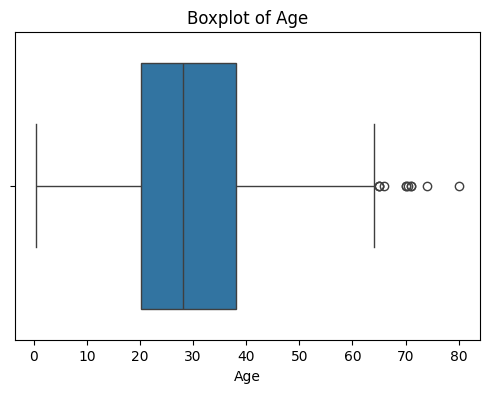

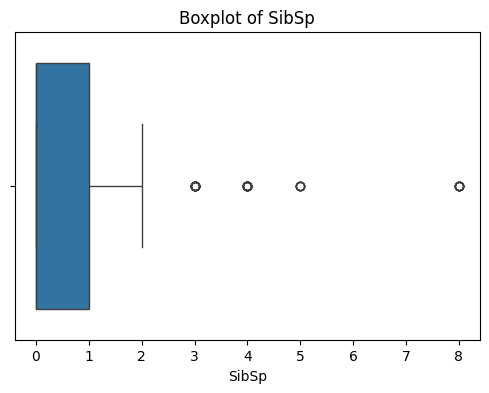

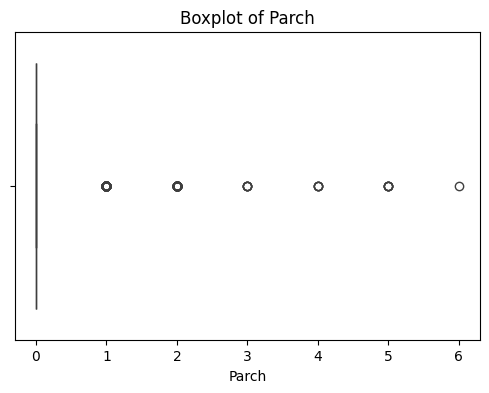

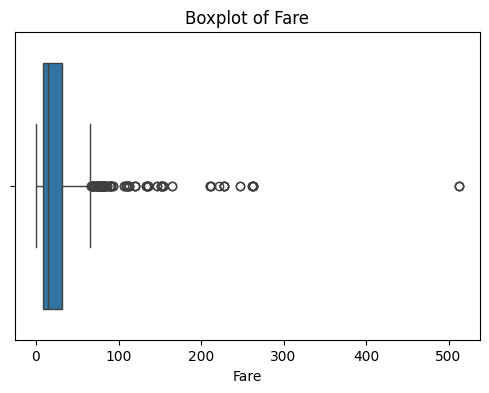

In [14]:
#Create histograms and boxplots for numeric features.
visualization_path = '../visualizations'
columns=df.select_dtypes(include=["float64","int64"])
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.savefig(visualization_path + '/all_histograms.png')
plt.show()
for col in columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.savefig(visualization_path+f'/{col}_Boxplot.png')
    plt.show()

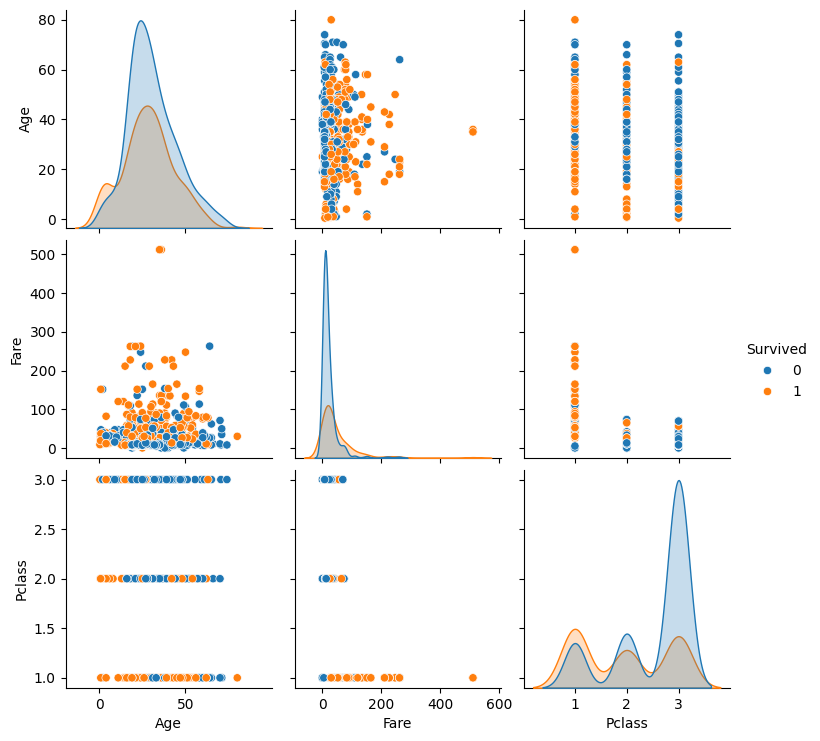

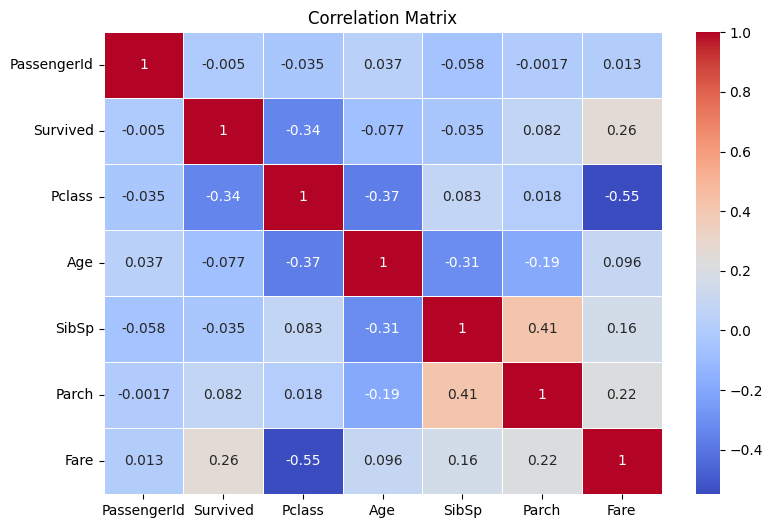

In [27]:
#Use pairplot/correlation matrix for feature relationships.
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']],hue="Survived")
plt.savefig(visualization_path + '/pairplot.png')
plt.show()
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.savefig(visualization_path + '/Correlation_Matrix.png')

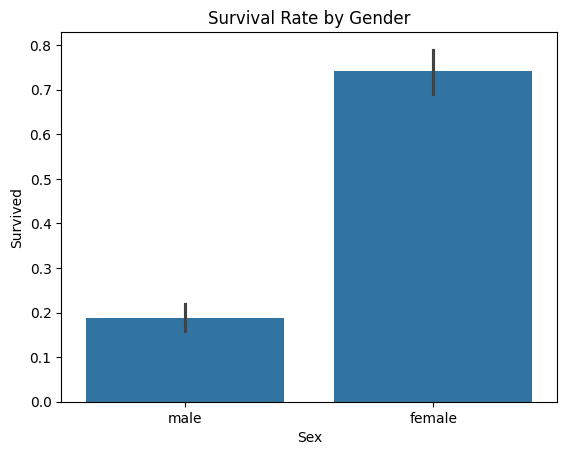

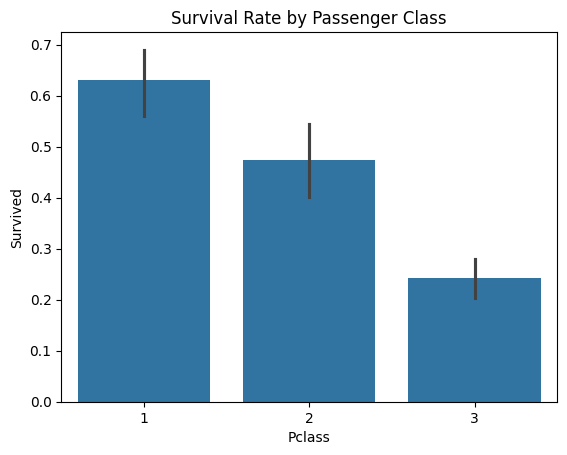

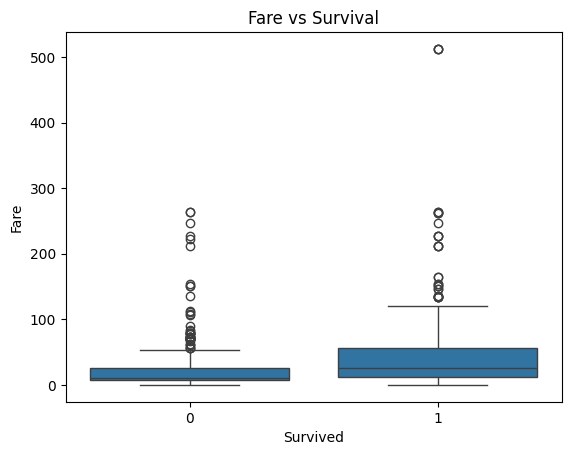

In [29]:
#Identify patterns, trends, or anomalies in the data.
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

In [ ]:
#Make basic feature-level inferences from visuals.

#Gender played a major role in survival
#Passenger class was a strong indicator of survival
#Fare is positively correlated with survival
#Younger passengers, especially children, were prioritized during evacuation.